DESCRIPTION
Help a leading mobile brand understand the voice of the customer by analyzing the reviews of their product on Amazon and the topics that customers are talking about. You will perform topic modeling on specific parts of speech. You’ll finally interpret the emerging topics.

Problem Statement: 
A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

Domain: Amazon reviews for a leading phone brand

Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

Content: 
Dataset: ‘K8 Reviews v0.2.csv’

Columns:
Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)

Reviews: The main text of the review

Steps to perform:
Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.
Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. Finally, give business-friendly names to the topics and make a table for business.

Tasks: 
1.	Read the .csv file using Pandas. Take a look at the top few records.
2.	Normalize casings for the review text and extract the text into a list for easier manipulation.
3.	Tokenize the reviews using NLTKs word_tokenize function.
4.	Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
5.	For the topic model, we should  want to include only nouns.
        1. Find out all the POS tags that correspond to nouns.
        2. Limit the data to only terms with these tags.
6.  Lemmatize.
        1. Different forms of the terms need to be treated as one.
        2. No need to provide POS tag to lemmatizer for now.
7.   Remove stopwords and punctuation (if there are any). 
8.   Create a topic model using LDA on the cleaned-up data with 12 topics
        1. Print out the top terms for each topic.
        2. What is the coherence of the model with the c_v metric?
9.  Analyze the topics through the business lens.
        1. Determine which of the topics can be combined.
10. Create a topic model using LDA with what you think is the optimal number of topics
        1. What is the coherence of the model?
11. The business should be able to interpret the topics.
        1. Name each of the identified topics.
        2. Create a table with the topic name and the top 10 terms in each to present to the business.

Auther: Preetida V-Jani/15th May 22

Libraries

In [1]:
#data manipulation
import numpy as np
import pandas as pd
import tqdm
#file and system operations
import os
import sys
assert sys.version_info >= (3,5)
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Task 1: Reading CSV file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving K8 Reviews v0.2.csv to K8 Reviews v0.2.csv


Storing dataset in PANDAS

In [3]:
import io
AnaReviews_df = pd.read_csv(io.BytesIO(uploaded['K8 Reviews v0.2.csv']))
AnaReviews_df.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


In [4]:
#checking number of AnaReviews
len(AnaReviews_df)

14675

Task 2: Normalize casings for the review text and extract the text into a list for easier manipulation.
Pre-Processing of Data

Replacing + Dropping NULL values

In [5]:
AnaReviews_df.isnull().sum()

sentiment    0
review       0
dtype: int64

In [6]:
AnaReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


- Above info oucome shows that Dataset does not have any null or missing values.

Converting to LOWER case

In [7]:
AnaReviews_df['clean_review'] = AnaReviews_df['review'].apply(lambda x: str(x).lower())
AnaReviews_df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...","worst mobile i have bought ever, battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...,when i will get my 10% cash back.... its alrea...
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


REMOVE NON-ALPHA DATA(DIGITS,PUNCTUATIONS,DIACRITICS)

In [8]:
AnaReviews_df['clean_review'] = AnaReviews_df['clean_review'].str.replace(r'[^a-zA-Z\s]', ' ',regex=True) 
AnaReviews_df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dr...
2,1,when I will get my 10% cash back.... its alrea...,when i will get my cash back its alrea...
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...


REMOVING WHITE SPACE

In [9]:
AnaReviews_df['clean_review'] = AnaReviews_df['clean_review'].str.replace(r'\s{2,}', ' ',regex=True)
AnaReviews_df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr...",worst mobile i have bought ever battery is dra...
2,1,when I will get my 10% cash back.... its alrea...,when i will get my cash back its already january
3,1,Good,good
4,0,The worst phone everThey have changed the last...,the worst phone everthey have changed the last...



Task 3: TOKENIZATION

In [10]:
AnaReviews_df['clean_review'] = AnaReviews_df['clean_review'].apply(lambda x: word_tokenize(x))
AnaReviews_df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, but, need, updates, and, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, i, have, bought, ever, battery..."
2,1,when I will get my 10% cash back.... its alrea...,"[when, i, will, get, my, cash, back, its, alre..."
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[the, worst, phone, everthey, have, changed, t..."


Task 7: REMOVE UNNECESSARY WORDS - Stop words

In [11]:
AnaReviews_df['clean_review'] = AnaReviews_df['clean_review'].apply\
(lambda x:[word for word in x if word not in stopwords.words("english") and len(word) > 3 and word.isalpha()])
AnaReviews_df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, need, updates, improvements]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,1,Good,[good]
4,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."


In [12]:
AnaReviews_df = AnaReviews_df[AnaReviews_df['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

Task 6: LEMMATIZATION

In [13]:
AnaReviews_df['clean_review'] = AnaReviews_df['clean_review'].apply\
(lambda x: [WordNetLemmatizer().lemmatize(word) for word in x])
AnaReviews_df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[good, need, update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[worst, mobile, bought, ever, battery, drainin..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, back, already, january]"
3,0,The worst phone everThey have changed the last...,"[worst, phone, everthey, changed, last, phone,..."
4,0,Only I'm telling don't buyI'm totally disappoi...,"[telling, buyi, totally, disappointedpoor, bat..."


Task 4: Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.

In [14]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

task 5: Extracting only NOUN

In [15]:
AnaReviews_df['clean_review'] = AnaReviews_df['clean_review'].apply\
(lambda x: [word for word in x if nltk.pos_tag([word])[0][1] == 'NN'])

In [16]:
AnaReviews_df = AnaReviews_df[AnaReviews_df['clean_review'].map(lambda x: len(x)) > 1].reset_index(drop=True)
# Keeping records with more than single words

In [17]:
AnaReviews_df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[need, update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, january]"
3,0,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon..."
4,0,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa..."


In [18]:
#check the sentiment labels as objective is to do topic modeling and not classification
AnaReviews_df['sentiment'].value_counts()

0    6630
1    4551
Name: sentiment, dtype: int64

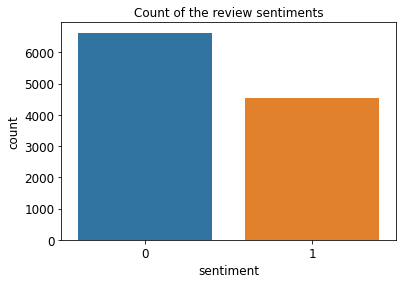

In [19]:
sns.countplot(AnaReviews_df['sentiment'])
plt.title('Count of the review sentiments')
plt.show()

- Above Plot visulaization shows that there are well diffiened dataset as 0 and 1 sentiments count size  is not differing much Such balancing is helpful in modeling 'sentiment'

In [20]:
#check randomly any of the reviews
random = np.random.randint(1,len(AnaReviews_df))
print(AnaReviews_df['review'][random])

Not very satisfied with it, it just capture some good images, apart that nothing is good in this phone..sometimes lags too much, msgs just gone disppear for while, sometimes doesnt show the contact Name, sometimes doesnt open the required app..before this phone. i was using Lenovo P2, i thought, lenovo has upgraded this phn with some extraordinary apps, but this phone dissapointed me..


Document Term Matrix

In [21]:
#load the gensim library
import gensim
from gensim import corpora 

In [22]:
dictionary = corpora.Dictionary(AnaReviews_df['clean_review'])
print(dictionary)

Dictionary(6724 unique tokens: ['improvement', 'need', 'update', 'amazon', 'backup']...)


In [23]:
dictionary.keys()[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [24]:
#print a few words in the dictionary
count = 0
for k,v in dictionary.iteritems():
    print(k,v)
    count = count + 1
    if count > 10:
        break

0 improvement
1 need
2 update
3 amazon
4 backup
5 battery
6 booster
7 bought
8 charger
9 fake
10 hell


In [25]:
doc_term_matrix = AnaReviews_df['clean_review'].apply(lambda x: dictionary.doc2bow(x))
doc_term_matrix[:10]

# Each tokenized words has been assigned index value and their count in corpus

0                             [(0, 1), (1, 1), (2, 1)]
1    [(3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1...
2                                   [(19, 1), (20, 1)]
3                  [(3, 2), (21, 1), (22, 3), (23, 1)]
4        [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]
5    [(14, 1), (22, 1), (29, 1), (30, 1), (31, 1), ...
6                           [(5, 1), (36, 1), (37, 1)]
7    [(14, 2), (22, 2), (23, 2), (34, 1), (38, 1), ...
8                 [(44, 1), (45, 1), (46, 1), (47, 1)]
9                  [(8, 1), (22, 1), (48, 1), (49, 1)]
Name: clean_review, dtype: object

In [26]:
document_num = random
bow_doc_x = doc_term_matrix[random]

for i in range(len(bow_doc_x)):
    print(f'Word {bow_doc_x[i][0]} {dictionary[bow_doc_x[i][0]]} appears {bow_doc_x[i][1]} times')

Word 14 lenovo appears 2 times
Word 22 phone appears 3 times
Word 115 show appears 1 times
Word 140 apps appears 1 times
Word 142 contact appears 1 times
Word 265 image appears 1 times
Word 323 name appears 1 times
Word 583 thought appears 1 times
Word 605 nothing appears 1 times
Word 627 lag appears 1 times
Word 636 doesnt appears 2 times
Word 931 capture appears 1 times
Word 1863 msg appears 1 times
Word 6041 disppear appears 1 times


Task 8: Topic model using LDA

In [27]:
from IPython.display import clear_output

In [28]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(corpus=doc_term_matrix, num_topics=12, id2word=dictionary, passes=10,random_state=45)
clear_output()

# corpus requires document term matrix
# num_topics is used to define number of topics to create from corpus
# id2word requires mapping of words
# passes is used to define number of iterations

In [29]:
'''
For each topic, explore each word and its relative weight in the topic
'''

for idx,topic in ldamodel.print_topics(-1,num_words=15):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.199*"camera" + 0.099*"quality" + 0.041*"phone" + 0.031*"sound" + 0.026*"front" + 0.025*"battery" + 0.022*"mode" + 0.019*"depth" + 0.017*"rear" + 0.016*"feature" + 0.015*"display" + 0.015*"performance" + 0.014*"dolby" + 0.013*"photo" + 0.012*"picture"


Topic: 1 
Words: 0.057*"android" + 0.042*"phone" + 0.034*"feature" + 0.031*"stock" + 0.028*"card" + 0.026*"contact" + 0.022*"user" + 0.021*"memory" + 0.020*"headphone" + 0.017*"slot" + 0.014*"con" + 0.013*"software" + 0.013*"provide" + 0.013*"message" + 0.010*"function"


Topic: 2 
Words: 0.315*"mobile" + 0.162*"problem" + 0.091*"heating" + 0.031*"battery" + 0.022*"heat" + 0.014*"network" + 0.012*"game" + 0.008*"month" + 0.007*"class" + 0.007*"hang" + 0.006*"player" + 0.006*"connection" + 0.006*"ringtone" + 0.005*"face" + 0.005*"time"


Topic: 3 
Words: 0.062*"phone" + 0.060*"screen" + 0.058*"charger" + 0.048*"turbo" + 0.039*"feature" + 0.027*"glass" + 0.018*"gorilla" + 0.017*"time" + 0.017*"charge" + 0.015*"core" + 0.

Visualizing LDA model topics

In [30]:
!pip install pyLDAvis # To visualize lda model

     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8962492279b5ff4fa4d50244c6a4d356c6d238ffc485f5f364274091eab5e1ac
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [46]:
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel,doc_term_matrix,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.151077 -0.183800       1        1  21.159834
3      0.081218 -0.004608       2        1  18.222326
0     -0.279494  0.006759       3        1  17.256118
1     -0.012698  0.279254       4        1  15.857927
2      0.224529 -0.098105       5        1  14.428330
4      0.137521  0.000500       6        1  13.075465, topic_info=        Term         Freq        Total Category  logprob  loglift
15    mobile  2208.000000  2208.000000  Default  30.0000  30.0000
77    camera  3300.000000  3300.000000  Default  29.0000  29.0000
5    battery  3096.000000  3096.000000  Default  28.0000  28.0000
117  quality  1341.000000  1341.000000  Default  27.0000  27.0000
34      note  1312.000000  1312.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
50   heating   132.785938  1249.732989   Topic6  -4.5803  -0.2075
150     work    88.727584   604.697023   Topic6  -4.9834   0.1153
49     month    79.606514   509.547508   Topic6  -5.0919   0.1780
205     hang    63.683875   221.282255   Topic6  -5.3151   0.7889
108      day    66.222488   479.081646   Topic6  -5.2760   0.0556

[398 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
806       6  0.971243     accept
391       2  0.966050  accessory
534       5  0.983278     airtel
1748      6  0.944513      alarm
3         1  0.084377     amazon
...     ...       ...        ...
116       2  0.629777      worth
116       3  0.108934      worth
116       6  0.003404      worth
1151      1  0.961934  yesterday
431       3  0.973765       zoom

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 2, 3, 5])

Above plot shows some topics are overlapping with each other hence will try to find optimal number of topics.

Task 10: A topic model using LDA with the optimal number of topics

In [32]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=AnaReviews_df['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Coherence Score:  0.5758709646389434


In [33]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [34]:
topic_num,cv_score = calculate_topic_cv(ldamodel,AnaReviews_df['clean_review'],dictionary,15)


Hyperparameter Tuning

    Number of topics K
    Dirichlet hyperparamater alpha: Document Topic Density
    Dirichlet hyperparameter beta: Word-Topic Density



In [35]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
6,0.609116
10,0.605270
7,0.602581
8,0.597894
3,0.589486
2,0.582708
9,0.582576
5,0.579579
12,0.575871


In [36]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=ldamodel,texts=AnaReviews_df['clean_review'],\
                                     dictionary=dictionary , coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Coherence Score:  0.5758709646389434


In [37]:
# Computing coherence score for different size of topic

def calculate_topic_cv(ldamodel,texts,dictionary,topic_range):
  cv_score =[]
  topic_num = []
  for i in range(2,topic_range):
    topic_num.append(i)
    Lda = gensim.models.ldamodel.LdaModel
    ldamodel = Lda(doc_term_matrix, num_topics=i, id2word=dictionary, passes=10,random_state=45)
    cv_score.append(CoherenceModel(model=ldamodel,texts=texts,\
                                   dictionary=dictionary , coherence='c_v').get_coherence())
    clear_output()
  return topic_num,cv_score

In [38]:
pd.DataFrame(zip(topic_num,cv_score),columns=['Topic','Coherence_Score']).set_index\
('Topic').sort_values('Coherence_Score',ascending=False)

,Coherence_Score
Topic,
6,0.609116
10,0.605270
7,0.602581
8,0.597894
3,0.589486
2,0.582708
9,0.582576
5,0.579579
12,0.575871


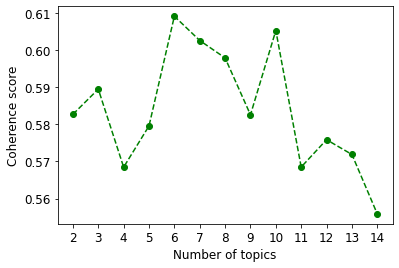

In [39]:
import matplotlib.pyplot as plt

plt.plot(topic_num,cv_score,color='green', marker='o', linestyle='dashed')
plt.xticks(range(2,15))
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.show()

Above plot shows that better to consider topics 6 as with 8 topics there will be many overlaps .

In [42]:
# Creating LDA model with number of topics as 6

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=6, id2word=dictionary, passes=10,random_state=45)
clear_output()
print(CoherenceModel(model=ldamodel,texts=AnaReviews_df['clean_review'],\
                     dictionary=dictionary , coherence='c_v').get_coherence())

0.6091161154634883


In [43]:
ldamodel.print_topics()

[(0,
  '0.156*"camera" + 0.078*"quality" + 0.039*"phone" + 0.022*"sound" + 0.021*"front" + 0.018*"mode" + 0.015*"depth" + 0.014*"performance" + 0.014*"display" + 0.014*"rear"'),
 (1,
  '0.082*"note" + 0.070*"lenovo" + 0.039*"phone" + 0.025*"call" + 0.024*"feature" + 0.017*"android" + 0.016*"product" + 0.012*"option" + 0.011*"speaker" + 0.011*"stock"'),
 (2,
  '0.154*"mobile" + 0.084*"problem" + 0.046*"heating" + 0.038*"product" + 0.038*"amazon" + 0.034*"issue" + 0.022*"return" + 0.018*"network" + 0.015*"lenovo" + 0.013*"time"'),
 (3,
  '0.076*"phone" + 0.036*"money" + 0.034*"screen" + 0.025*"charger" + 0.022*"product" + 0.021*"lenovo" + 0.021*"turbo" + 0.019*"waste" + 0.014*"amazon" + 0.013*"value"'),
 (4,
  '0.086*"phone" + 0.040*"update" + 0.038*"issue" + 0.026*"problem" + 0.025*"service" + 0.022*"lenovo" + 0.021*"network" + 0.021*"software" + 0.013*"volta" + 0.012*"call"'),
 (5,
  '0.135*"battery" + 0.126*"phone" + 0.035*"price" + 0.030*"awesome" + 0.030*"camera" + 0.030*"fast" + 0.

In [48]:
gensimvis.prepare(ldamodel,doc_term_matrix,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.151077 -0.183800       1        1  21.152992
3      0.081218 -0.004608       2        1  18.232585
0     -0.279494  0.006759       3        1  17.253662
1     -0.012698  0.279254       4        1  15.850326
2      0.224529 -0.098105       5        1  14.433065
4      0.137521  0.000500       6        1  13.077369, topic_info=        Term         Freq        Total Category  logprob  loglift
15    mobile  2209.000000  2209.000000  Default  30.0000  30.0000
77    camera  3300.000000  3300.000000  Default  29.0000  29.0000
5    battery  3095.000000  3095.000000  Default  28.0000  28.0000
117  quality  1340.000000  1340.000000  Default  27.0000  27.0000
34      note  1312.000000  1312.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
50   heating   132.805278  1249.817073   Topic6  -4.5803  -0.2076
150     work    88.740507   604.779535   Topic6  -4.9834   0.1151
49     month    79.618108   509.671456   Topic6  -5.0919   0.1778
205     hang    63.693150   221.307883   Topic6  -5.3151   0.7888
108      day    66.232133   479.213138   Topic6  -5.2760   0.0553

[398 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
806       6  0.971107     accept
391       2  0.965525  accessory
534       5  0.982968     airtel
1748      6  0.944380      alarm
3         1  0.084348     amazon
...     ...       ...        ...
116       2  0.629615      worth
116       3  0.108906      worth
116       6  0.003403      worth
1151      1  0.962235  yesterday
431       3  0.973898       zoom

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 2, 3, 5])

In [49]:
AnaReviews_df.head()

,sentiment,review,clean_review
0,1,Good but need updates and improvements,"[need, update, improvement]"
1,0,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ..."
2,1,when I will get my 10% cash back.... its alrea...,"[cash, january]"
3,0,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon..."
4,0,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa..."


Creating a lookup table for topics

In [50]:
topic_lookup_data = pd.DataFrame((ldamodel.print_topics()),columns=['Topic_Number','Top_Keywords'])
topic_lookup_data['Topic_Name'] = ['Camera, Sound','Mixed issues','Heating issue','turbo charger','Connectivity','Battery']
topic_lookup_data = topic_lookup_data[['Topic_Number','Topic_Name','Top_Keywords']]
topic_lookup_data['Top_Keywords'] = topic_lookup_data.Top_Keywords.str\
.replace(r'[^a-z]',' ',regex=True).apply(lambda x: x.split())
topic_lookup_data.style.set_properties(subset=['Top_Keywords'], **{'width': '300px'})

,Topic_Number,Topic_Name,Top_Keywords
0,0,"Camera, Sound","['camera', 'quality', 'phone', 'sound', 'front', 'mode', 'depth', 'performance', 'display', 'rear']"
1,1,Mixed issues,"['note', 'lenovo', 'phone', 'call', 'feature', 'android', 'product', 'option', 'speaker', 'stock']"
2,2,Heating issue,"['mobile', 'problem', 'heating', 'product', 'amazon', 'issue', 'return', 'network', 'lenovo', 'time']"
3,3,turbo charger,"['phone', 'money', 'screen', 'charger', 'product', 'lenovo', 'turbo', 'waste', 'amazon', 'value']"
4,4,Connectivity,"['phone', 'update', 'issue', 'problem', 'service', 'lenovo', 'network', 'software', 'volta', 'call']"
5,5,Battery,"['battery', 'phone', 'price', 'awesome', 'camera', 'fast', 'performance', 'backup', 'product', 'heating']"


Creating new columns and inserting topic numbers and names

In [51]:
for index,sent in enumerate(ldamodel[doc_term_matrix]):
  topic_num =[]
  topic_details = sorted(sent,key=lambda x: x[1], reverse=True)[:2] # Getting top 2 topics in descending order
  topic_num.append(topic_details[0][0]) # Appending top topic
  if len(topic_details) > 1:
    if topic_details[1][1] > 0.35: # Appending second topic only if it has more than 35% influence on current row
      topic_num.append(topic_details[1][0])
  AnaReviews_df.loc[index,'Topic_Number'] = ','.join(str(x) for x in sorted(topic_num))

In [53]:
for index,topic_num in enumerate(AnaReviews_df.Topic_Number):
  topic_name_list=[]
  for single_topic_num in topic_num.split(','):
    single_topic_num=int(single_topic_num)
    topic_name_list.append(topic_lookup_data.loc\
                           [topic_lookup_data.Topic_Number == single_topic_num,'Topic_Name'][single_topic_num]) 
  # Extracting topic names from lookup table
  AnaReviews_df.loc[index,'Topic_Name'] =' & '.join(topic_name_list)

In [54]:
AnaReviews_df.head()

,sentiment,review,clean_review,Topic_Number,Topic_Name
0,1,Good but need updates and improvements,"[need, update, improvement]","0,4","Camera, Sound & Connectivity"
1,0,"Worst mobile i have bought ever, Battery is dr...","[mobile, bought, battery, hell, backup, hour, ...",3,turbo charger
2,1,when I will get my 10% cash back.... its alrea...,"[cash, january]",0,"Camera, Sound"
3,0,The worst phone everThey have changed the last...,"[phone, everthey, phone, problem, amazon, phon...",3,turbo charger
4,0,Only I'm telling don't buyI'm totally disappoi...,"[buyi, disappointedpoor, batterypoor, camerawa...",4,Connectivity


Visualization

In [55]:
import seaborn as sns

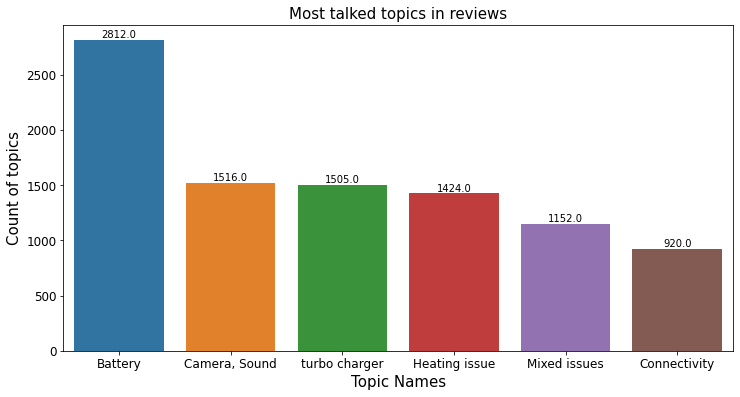

In [57]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=AnaReviews_df.Topic_Name.value_counts()[:6].index,y=AnaReviews_df.Topic_Name.value_counts()[:6].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+50),ha = 'center', va = 'center')
plt.xlabel('Topic Names',size=15)
plt.ylabel('Count of topics',size=15)
plt.title('Most talked topics in reviews',size=15)
plt.show()



Above chart shows the issues relevant to mobile phone include Battery, Camera, Sound, turbo charger, Heating issues, Mixed issues and connectivity, Where client faced highest issue relevant to Battery and least problem with connectivity issue.


Task 9: Analyze the topics through the business lens.

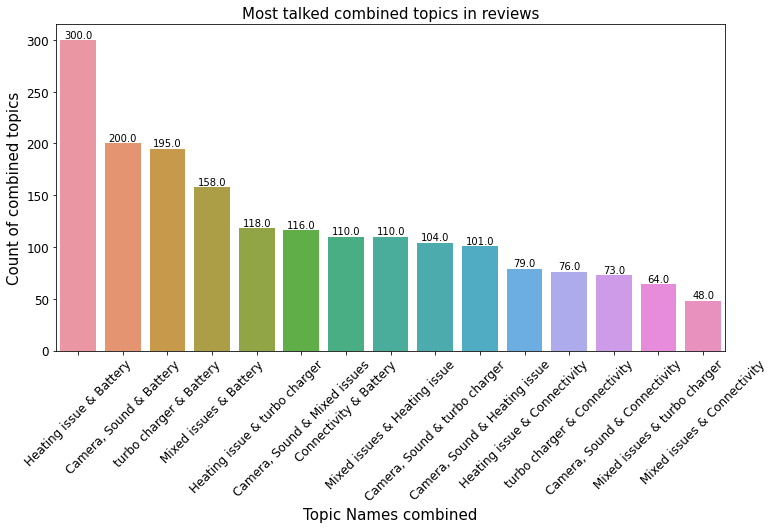

In [60]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=AnaReviews_df.Topic_Name.value_counts()[6:].index,y=AnaReviews_df.Topic_Name.value_counts()[6:].values)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+5),ha = 'center', va = 'center')
plt.xlabel('Topic Names combined',size=15)
plt.ylabel('Count of combined topics',size=15)
plt.title('Most talked combined topics in reviews',size=15)
plt.xticks(rotation=45)
plt.show()



From above chart one can say can say that most of customers had combined issues with,

    Heating issue & Battery
    Camera, Sound & Battery
    turbo charger & Battery



Task 10: Interpreting the topics.

Extracting reviews of 5 topic (review of battery)

In [61]:
AnaReviews_df.loc[AnaReviews_df.Topic_Number.str.contains('5'),['review','Topic_Name']].head(10)\
.style.set_properties(subset=['review'], **{'width': '300px'})

,review,Topic_Name
5,"Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note",Battery
10,"Don't purchase this item, It is so much of heating &Battery life is very poor",Heating issue & Battery
12,Very good phone slim good battry backup good screen love it,Battery
15,Battery draining very rapidly I don't know why..Tell me possible solutions for battery life,Heating issue & Battery
17,"Excellent camera , excellent speed.excellent features.excelent battery.",Battery
18,It is not a very good product camera are very poor ...Os is not good...Battery draining very quickly...Like a odinary phone..It was fully unexpected product from Lenovo..,Battery
21,Awesome phone in this price and this is my second mobile from lenovo. It is fast and display has been improved.,Heating issue & Battery
24,"Before the new update of 8.0 Oreo, it worked superbly, the battery back-up is also superb and there is not that much heating problem...But... After that update, my phone got heating up simply, battery is also draining unnecessarily... really very much disappointed after that update of 8.0 Oreo...😒😒☹️",Connectivity & Battery
26,Good performance but the battery gets oveheated,Battery
27,Best camera and better backup is very bestIn this priceFull passa wasole phone,Battery


Conclusion   

1. One can combine topic number 2 (Heating issue),3 (turbo charger), 5 (Battery)
2. If lenovo company improve their turbo charger that is causing heating issues in battery their mobile then it may have high preference from user to purchase.
3. Model can be further improved by isung other POS tags





References:

1.   https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc
2.   https://mickzhang.com/amazon-reviews-using-sentiment-analysis 